# Basics of logistic regression

## Import the relevant libraries

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [4]:
raw_data = pd.read_csv("2.01.+Admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [6]:
# Replace all No entries by 0, and all entries Yes by1
data = raw_data.copy()
data["Admitted"] = data["Admitted"].map({"Yes": 1, "No": 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [7]:
# Create the dependent and independent variabeles
y = data["Admitted"]
x1 = data["SAT"]

## Let's plot the data

### Scatter plot

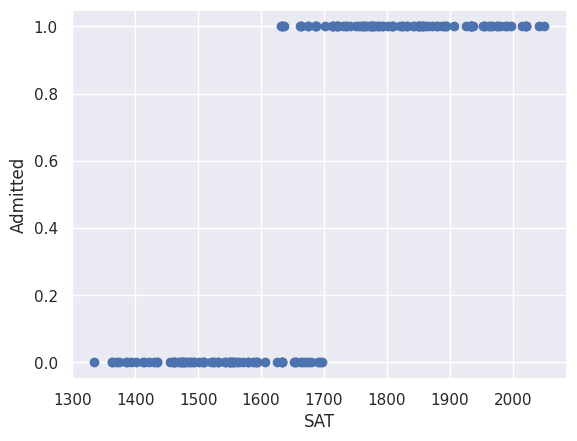

In [10]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1, y)
# Don't forget to label your axes!
plt.xlabel("SAT")
plt.ylabel("Admitted")
plt.show()

### Plot with a regression line

                            OLS Regression Results                            
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.98e-43
Time:                        15:06:58   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.0

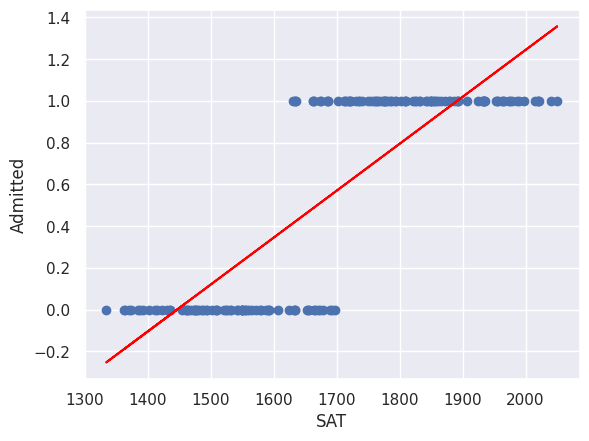

In [25]:
# Create a linear regression on the data in order to estiate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y, x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
result_lin = reg_lin.fit()
print(result_lin.summary())

# Create a scatter plot
plt.scatter(x1, y)
yhat = x1*result_lin.params[1] + result_lin.params[0]
plt.plot(x1, yhat, color='red')
plt.xlabel("SAT")
plt.ylabel("Admitted")
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.7992
Time:                        15:07:37   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0

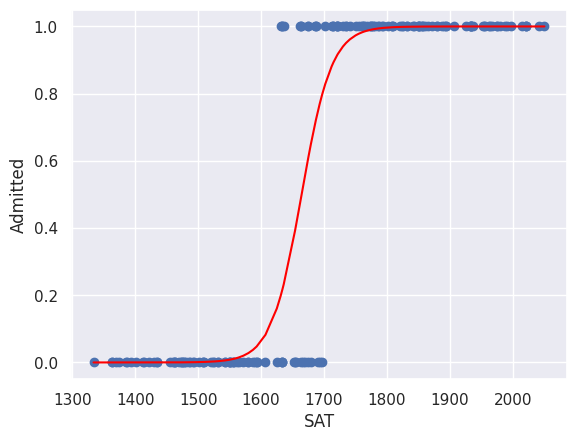

In [27]:
# Create a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y, x)
# Fitting the regression
result_log = reg_log.fit()
print(result_log.summary())

# Create a logit function, depending on the input ad coefficients
def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1, result_log.params[0], result_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y)
plt.xlabel("SAT")
plt.ylabel("Admitted")
# Plotting the curve
plt.plot(x_sorted, f_sorted, color="red")
plt.show()